# **Unmessenger**
# **Assignment 6**
## **Deeptanshu Pandey**

## **CAR PRICE PREDICTION**

### Importing the libraries and dependies

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

#### Importing the Data set

In [97]:
# loading the car data in pandas dataframe
df = pd.read_csv("/content/car data.csv")

In [98]:
# top 5 rows of car_price_prediction dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [100]:
# checking the number of rows and columns in dataframe df 
df.shape

(301, 9)

In [101]:
# getting th info of data and its data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Data Preprocessing


In [102]:
# checking for null in the dataframe
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### hence dataset having zero nulls and mussing values 

In [103]:
# checking for duplicated values
df.duplicated().sum()

2

In [104]:
df = df.drop_duplicates(keep = 'first')

In [105]:
df.duplicated().sum()

0

#### Hence zero duplicated values

In [106]:
#statistical analysis of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


<ipython-input-107-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

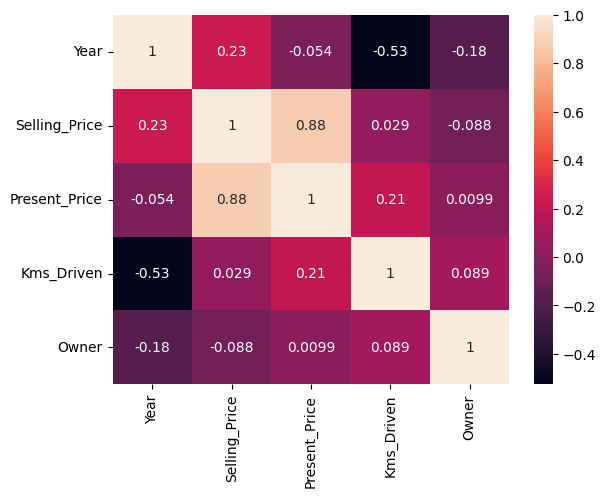

In [107]:
sns.heatmap(df.corr(), annot = True)

#### Hence Selling_Price shows positive correlation with Year of 0.23

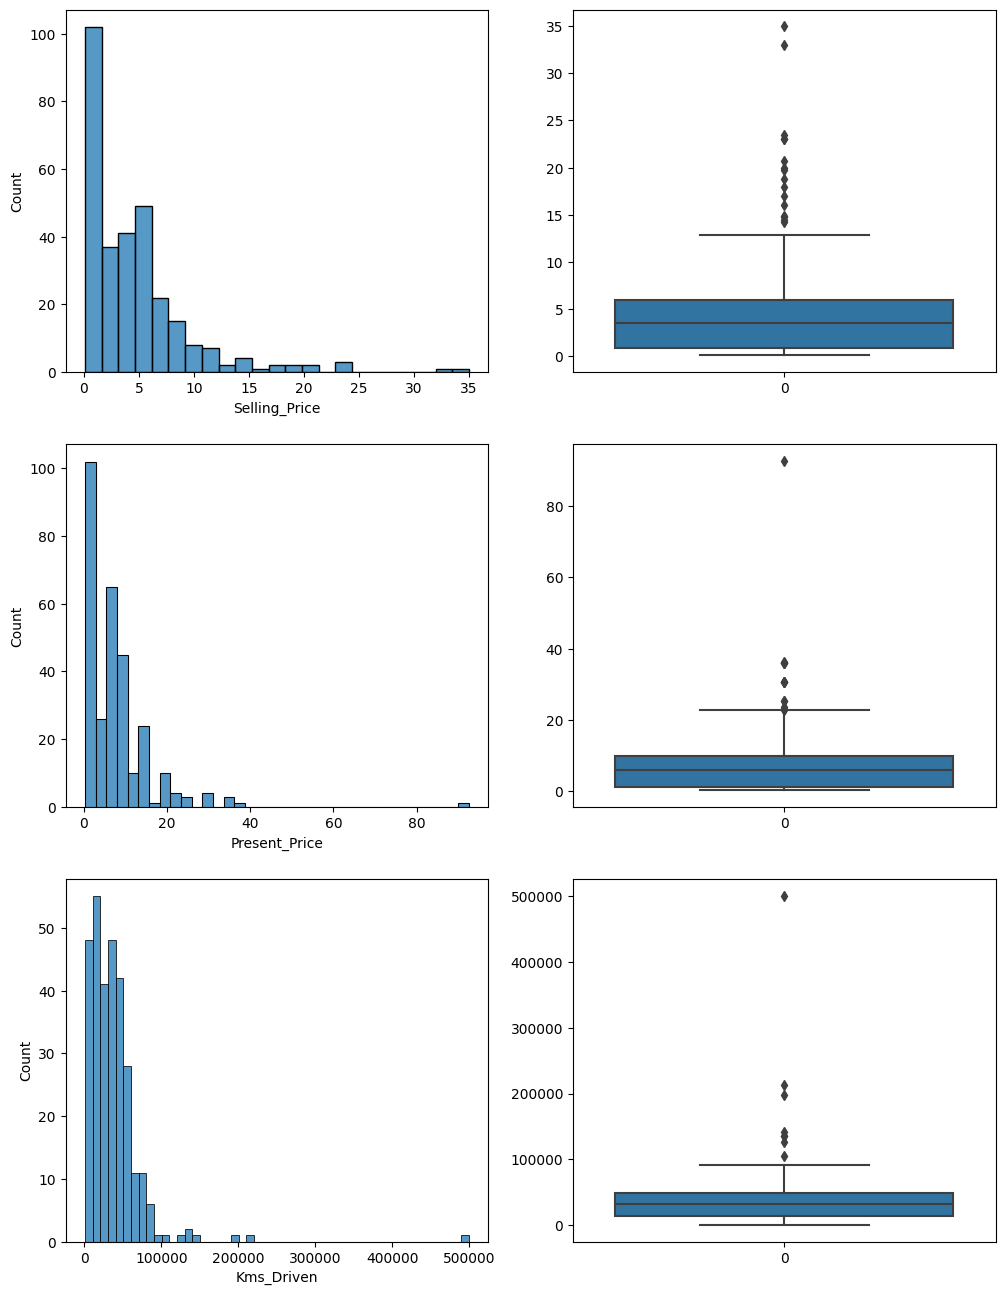

In [108]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(12, 16)

plot = sns.histplot(data=df, x="Selling_Price", ax=axis[0][0])
plot = sns.boxplot(df['Selling_Price'], ax=axis[0][1])

plot = sns.histplot(data=df, x="Present_Price", ax=axis[1][0])
plot = sns.boxplot(df['Present_Price'], ax=axis[1][1])

plot = sns.histplot(data=df, x="Kms_Driven", ax=axis[2][0])
plot = sns.boxplot(df['Kms_Driven'], ax=axis[2][1])

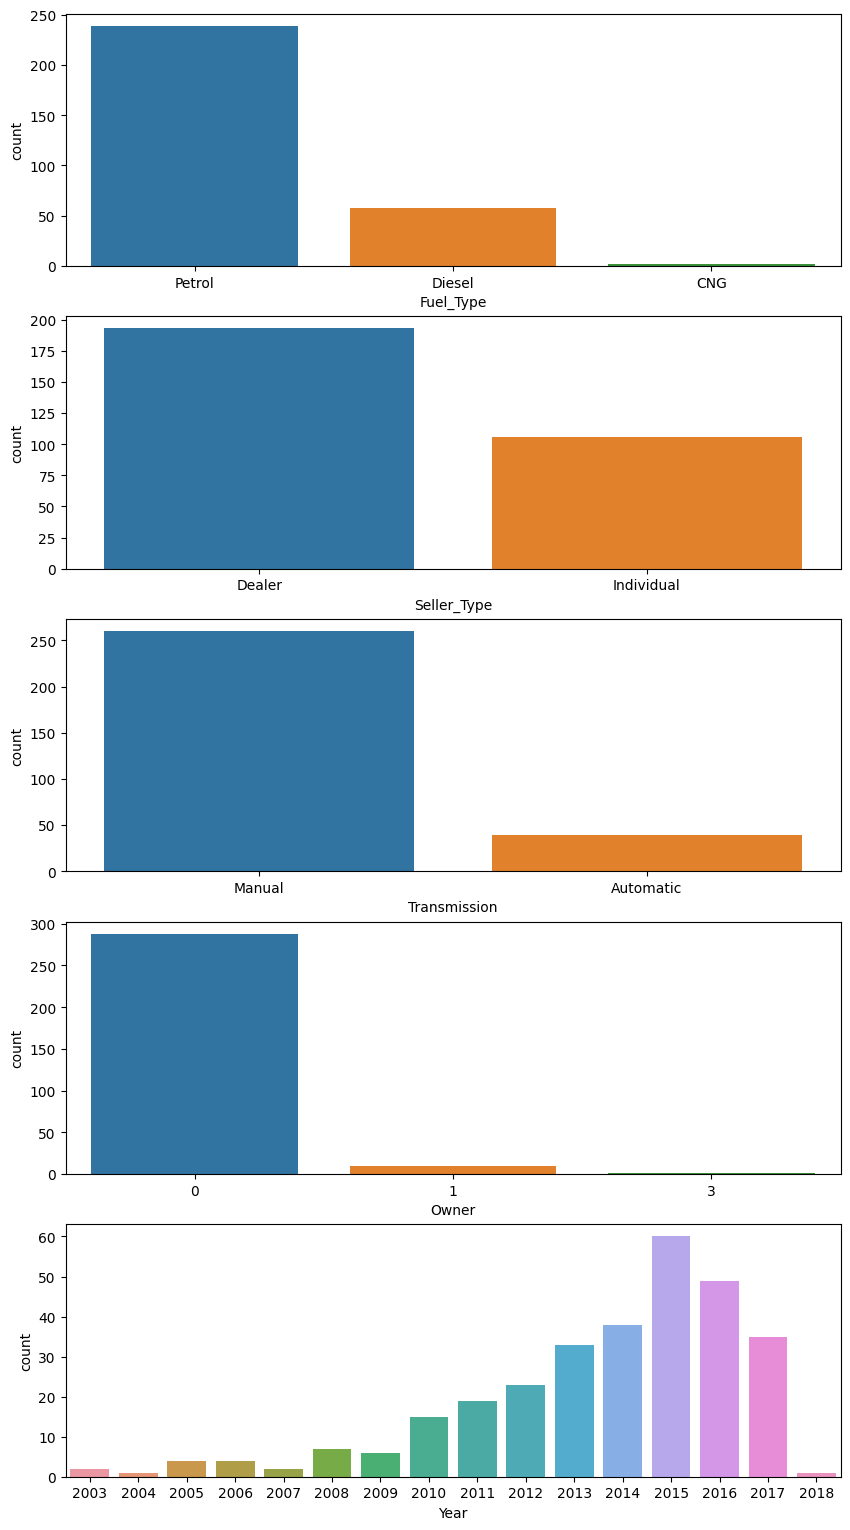

In [109]:

fig, axs = plt.subplots(5,1)
fig.set_size_inches(10, 19)

plot = sns.countplot(x = df['Fuel_Type'], ax=axs[0])
plot = sns.countplot(x = df['Seller_Type'], ax=axs[1])
plot = sns.countplot(x = df['Transmission'], ax=axs[2])
plot = sns.countplot(x = df['Owner'], ax=axs[3])
plot = sns.countplot(x = df['Year'], ax=axs[4])

### Bi-variate Analysis

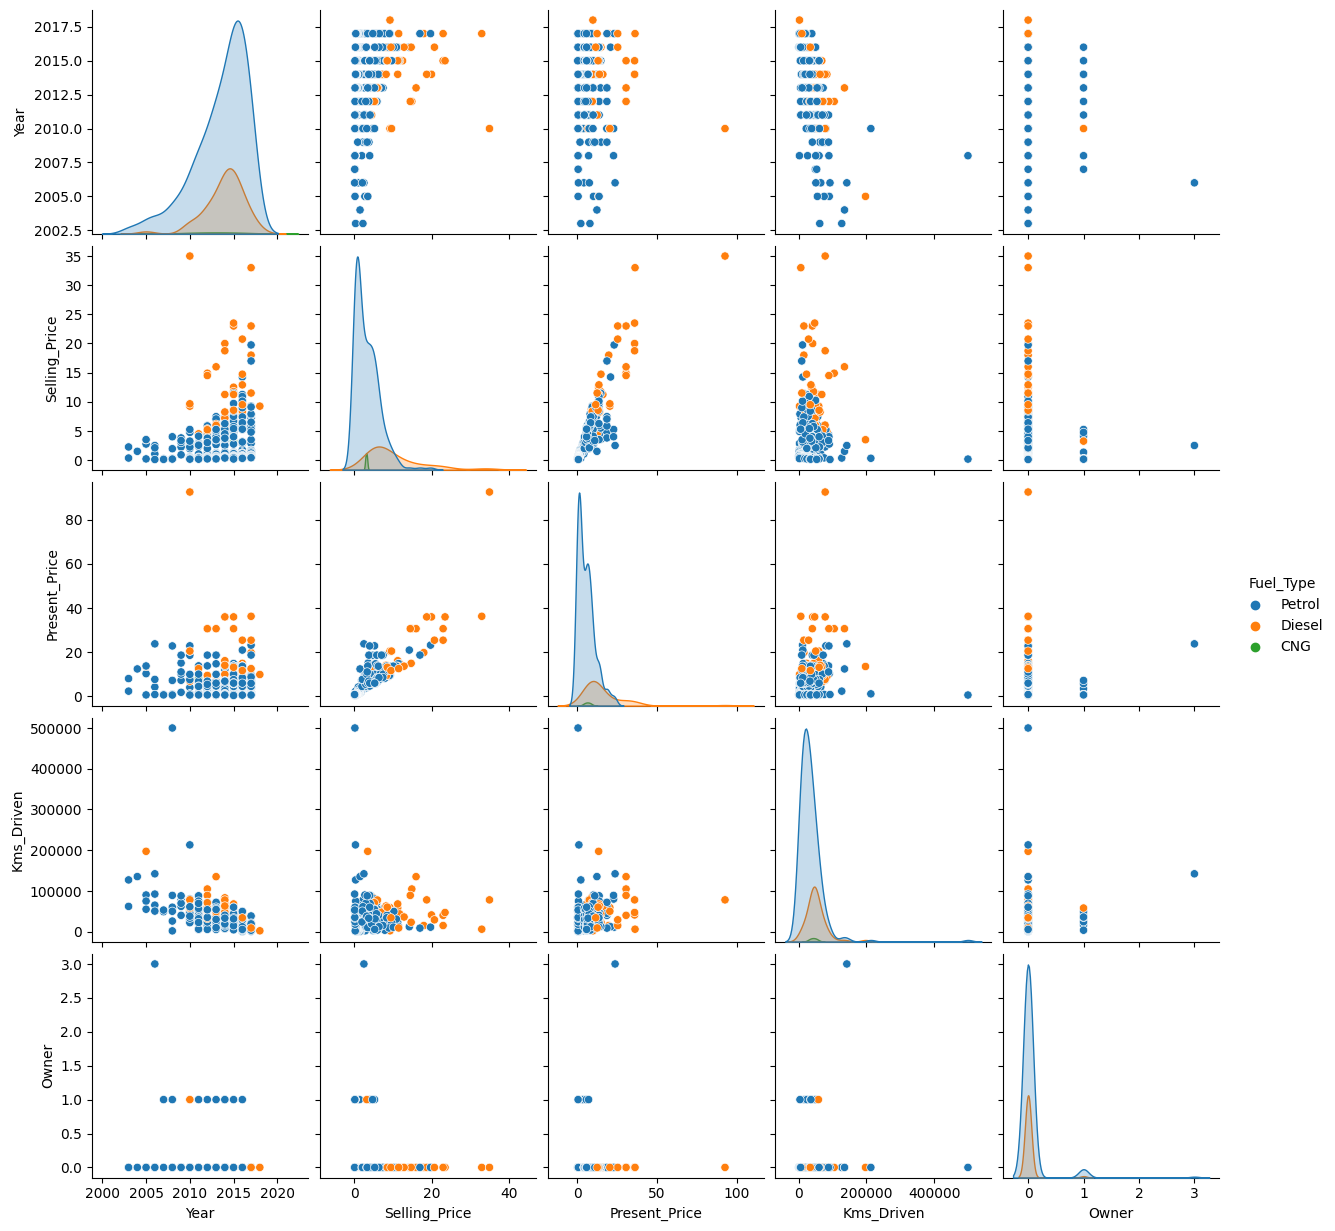

In [110]:
sns.pairplot(df, hue = 'Fuel_Type')

#### Multi-Variate Analysis

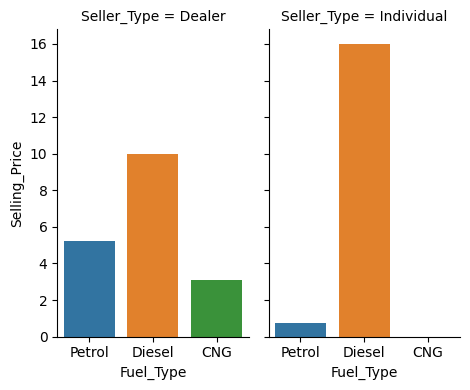

In [111]:
sns.catplot(
    data=df, x="Fuel_Type", y="Selling_Price", col="Seller_Type",
    kind="bar", height=4, aspect=.6, errorbar=None
)

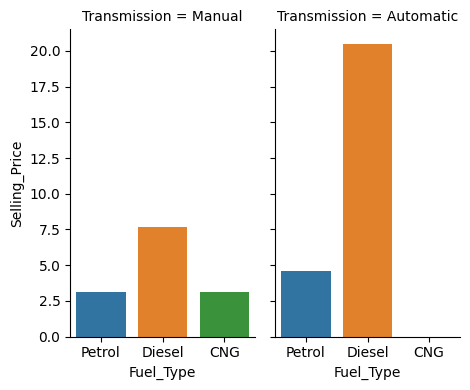

In [112]:
sns.catplot(
    data=df, x="Fuel_Type", y="Selling_Price", col="Transmission",
    kind="bar", height=4, aspect=.6, errorbar=None
)

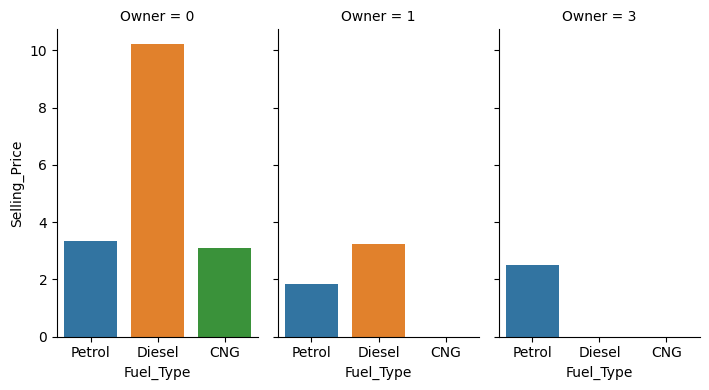

In [113]:
sns.catplot(
    data=df, x="Fuel_Type", y="Selling_Price", col="Owner",
    kind="bar", height=4, aspect=.6, errorbar=None
)

In [114]:
# importing the label encoder for encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [115]:
df['Fuel_Type'] = enc.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = enc.fit_transform(df['Seller_Type'])
df['Transmission']  = enc.fit_transform(df['Transmission'])

In [116]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


Train Test Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [119]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [120]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (239, 7)
X test:  (60, 7)
y train:  (239,)
y test:  (60,)


### Model Creation
   ### 1. Linear Regression
   ### 2. Lasso Regression
   ### 3. Random Forest Regression
   ### 4. Decision Tree Regression 

In [140]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [141]:
def car_prediction(model):

    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train = round(R2_train_model,2)

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test = round(R2_test_model,2)

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV = round(cv_mean,2)

    return R2_train, R2_test, cross_val, CV, y_pred_train, y_pred_test

     

In [124]:
def pred_result(score_train, score_test, cv_list, cv_mean):
    
    print("Train R2-score :", score_train)
    print("Test R2-score :", score_test)
    print("Train CV scores :", cv_list)
    print("Train CV mean :", cv_mean)
     

In [125]:
def MSE(y , y_hat): # lesser the better 
    error = y - y_hat 
    squared_error = np.square(error)
    mean_squared_error = np.mean(np.square(error))
    return round(mean_squared_error,4)

In [126]:
def plot(y_train_prediction, y_test_prediction):
     
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))

    ax[0].set_title('Residual Plot of Train samples')
    sns.kdeplot((y_train-y_train_prediction),ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_prediction)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()
    

In [127]:
l = LinearRegression()

In [128]:
r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr, y_pred_train_values_lr, y_pred_test_values_lr= car_prediction(l)

In [129]:
pred_result(r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr)
print('Mean square error: ', MSE(y_test, y_pred_test_values_lr))

Train R2-score : 0.86
Test R2-score : 0.86
Train CV scores : [0.78823357 0.78500594 0.78026324 0.76092386 0.92467311]
Train CV mean : 0.81
Mean square error:  5.4757


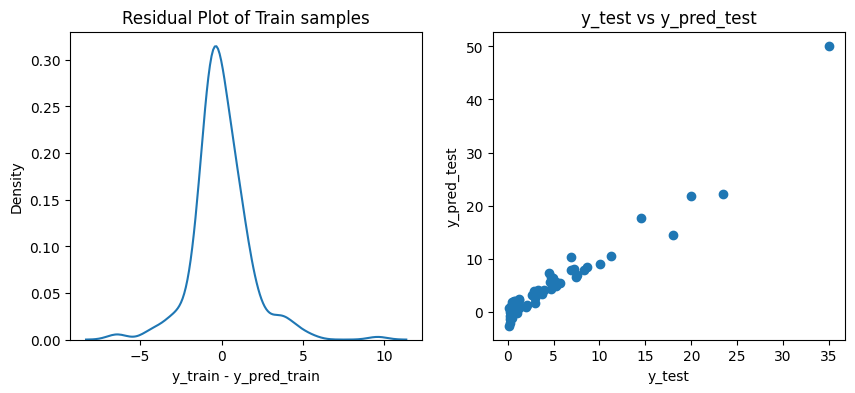

In [130]:
plot(y_pred_train_values_lr, y_pred_test_values_lr)

In [131]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [132]:
r2_score_train_ls, r2_score_test_ls, crossval_list_ls, CVmean_ls, y_pred_train_values_ls, y_pred_test_values_ls = car_prediction(ls_rs)

In [133]:
pred_result(r2_score_train_ls, r2_score_test_ls, crossval_list_ls, CVmean_ls)
print('Mean square error: ', MSE(y_test, y_pred_test_values_ls))

Train R2-score : 0.85
Test R2-score : 0.83
Train CV scores : [0.80780102 0.80944322 0.78221331 0.77895825 0.92561906]
Train CV mean : 0.82
Mean square error:  6.7426


In [134]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [135]:
r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf, y_pred_train_values_rf, y_pred_test_values_rf = car_prediction(rf_rs)

In [136]:
pred_result(r2_score_train_rf, r2_score_test_rf, crossval_list_rf, CVmean_rf)
print('Mean square error: ', MSE(y_test, y_pred_test_values_rf))

Train R2-score : 0.94
Test R2-score : 0.75
Train CV scores : [0.86366198 0.76952835 0.86863351 0.89443546 0.9064076 ]
Train CV mean : 0.86
Mean square error:  9.8043


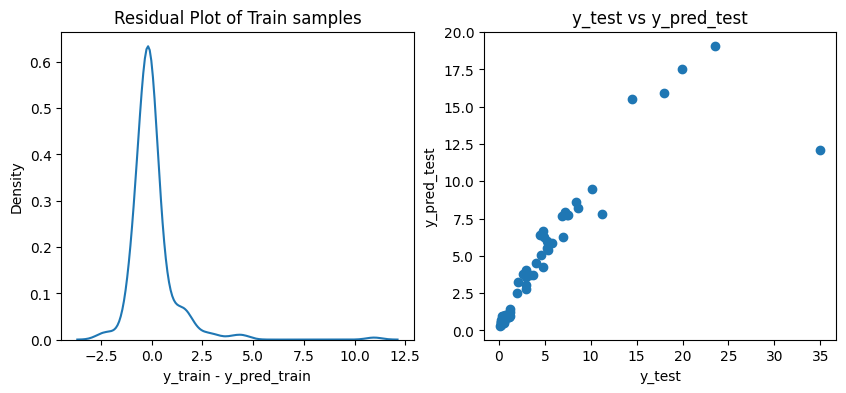

In [137]:
plot(y_pred_train_values_rf, y_pred_test_values_rf)

In [138]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=700)


In [142]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [143]:
r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb, y_pred_train_values_gb, y_pred_test_values_gb = car_prediction(gb_rs)

In [144]:
pred_result(r2_score_train_gb, r2_score_test_gb, crossval_list_gb, CVmean_gb)
print('Mean square error: ', MSE(y_test, y_pred_test_values_gb))

Train R2-score : 1.0
Test R2-score : 0.82
Train CV scores : [0.92355343 0.89375008 0.9230438  0.92207669 0.95841237]
Train CV mean : 0.92
Mean square error:  7.2967


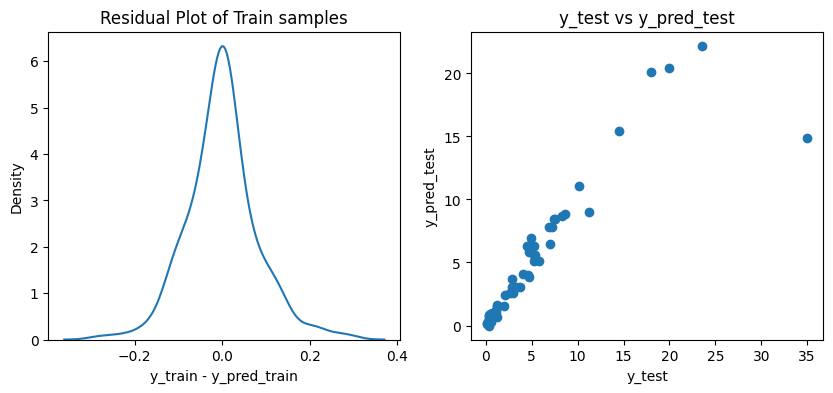

In [145]:
plot(y_pred_train_values_gb, y_pred_test_values_gb)

In [146]:
print(f"{'Model Name':30} {'R2_score (Train)':17} {'R2_score (Test)':17} {'Cross_Value (mean)':20} {'MSE':6}")
print('-'*95)
print(f"{'GradientBoostingRegressor':30} {r2_score_train_gb:<17} {r2_score_test_gb:<17} {CVmean_gb:<20} {MSE(y_test, y_pred_test_values_gb):<6}")
print(f"{'RandomForestRegressor':30} {r2_score_train_rf:<17} {r2_score_test_rf:<17} {CVmean_rf:<20} {MSE(y_test, y_pred_test_values_rf):<6}")
print(f"{'LinearRegression':30} {r2_score_train_lr:<17} {r2_score_test_lr:<17} {CVmean_lr:<20} {MSE(y_test, y_pred_test_values_lr):<6}")
print(f"{'Lasso':30} {r2_score_train_ls:<17} {r2_score_test_ls:<17} {CVmean_ls:<20} {MSE(y_test, y_pred_test_values_ls):<6}")

Model Name                     R2_score (Train)  R2_score (Test)   Cross_Value (mean)   MSE   
-----------------------------------------------------------------------------------------------
GradientBoostingRegressor      1.0               0.82              0.92                 7.2967
RandomForestRegressor          0.94              0.75              0.86                 9.8043
LinearRegression               0.86              0.86              0.81                 5.4757
Lasso                          0.85              0.83              0.82                 6.7426


## Gradient Boosting has good R2_score so it is the best model